In [30]:
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pathlib import Path
import gzip
import matplotlib.pyplot as plt

In [31]:
datasetName = "debate2024_Jun_mastodon"
dataPath = Path("Data")

In [32]:
with gzip.open(dataPath / f"{datasetName}.feather.gz", 'rb') as f:
    df = pd.read_feather(f)

In [33]:
df

,creation_date,text,data_server,hashtags,mentioned_users,urls,post_id,user_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs,data_internal_id,data_internal_user_id,data_account_followers_count,data_account_following_count,data_account_bot
0,2024-06-24 23:25:11+00:00,when you vote for a fascist you also vote for ...,mastodon.world,[],[],[],https://mastodon.world/users/curiousgawker/sta...,https://mastodon.world/users/curiousgawker,None,None,None,None,post,en,112674177778046401,109492144978556124,135,226,False
1,2024-06-25 00:01:44+00:00,Judge Skeptical About Request to Limit Trump S...,press.coop,[#press],[],[https://www.nytimes.com/2024/06/24/us/politic...,https://press.coop/users/nytimes/statuses/1126...,https://press.coop/users/nytimes,None,None,None,None,post,en,112674322043671652,109865917404093904,8761,0,True
2,2024-06-25 00:03:05+00:00,SUMMARY: There have been intense clashes in Ra...,mastodon.archive.org,[],[],[],https://mastodon.archive.org/users/tv/statuses...,https://mastodon.archive.org/users/tv,None,None,None,None,post,en,112674327116459618,110110110537031849,191,0,True
3,2024-06-25 00:04:07+00:00,#gaza #hamas #israel #palestine #USpo...,freeradical.zone,"[#gaza, #hamas, #israel, #palestine, #uspoliti...",[],[https://jewishcurrents.org/why-ceasefire-talk...,https://freeradical.zone/users/steve_zeke/stat...,https://freeradical.zone/users/steve_zeke,None,None,None,None,post,en,112674330881565089,109123561749631592,338,297,False
4,2024-06-25 00:04:59+00:00,How ‘ #ProLife ’ Lost all #Meaning The #Anti...,masto.ai,"[#prolife, #meaning, #antiabortion, #dobbs, #l...",[],[https://www.theatlantic.com/newsletters/archi...,https://masto.ai/users/Nonilex/statuses/112674...,https://masto.ai/users/Nonilex,None,None,None,None,post,en,112674334341186884,109305960345161174,4597,1824,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702121,2024-07-02 23:53:34+00:00,Trump Lawyers Seek Dismissal of NY Conviction ...,gratefuldread.masto.host,"[#leftistnews, #news, #vsn]",[],[https://truthout.org/articles/trump-lawyers-s...,https://gratefuldread.masto.host/users/verdant...,https://gratefuldread.masto.host/users/verdant...,None,None,None,None,post,en,112719589164666456,110507107648889350,696,18,False
1702122,2024-07-02 23:54:31+00:00,Step.Down. https://puck.news/biden-plunges-in-...,mastodon.social,[],[],[https://puck.news/biden-plunges-in-swing-stat...,https://mastodon.social/users/rodhilton/status...,https://mastodon.social/users/rodhilton,None,None,None,None,post,en,112719591675934680,109569363886763922,7832,652,False
1702123,2024-07-02 23:53:05+00:00,If you come on here in my mentions with this b...,mas.to,[],[],[],https://mas.to/users/popcornreel/statuses/1127...,https://mas.to/users/popcornreel,None,None,None,None,post,en,112719586059034533,109565731367313148,3119,20,False
1702124,2024-07-02 22:31:59+00:00,What the fuck??? https://19thnews.org/2024/07...,mastodon.social,[],[],[https://19thnews.org/2024/07/white-house-stat...,https://mastodon.social/users/alexcox/statuses...,https://mastodon.social/users/alexcox,None,None,None,None,post,en,112719267038719729,109752960265849134,3308,627,False


In [34]:
df.head(5)

,creation_date,text,data_server,hashtags,mentioned_users,urls,post_id,user_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs,data_internal_id,data_internal_user_id,data_account_followers_count,data_account_following_count,data_account_bot
0,2024-06-24 23:25:11+00:00,when you vote for a fascist you also vote for ...,mastodon.world,[],[],[],https://mastodon.world/users/curiousgawker/sta...,https://mastodon.world/users/curiousgawker,None,None,None,None,post,en,112674177778046401,109492144978556124,135,226,False
1,2024-06-25 00:01:44+00:00,Judge Skeptical About Request to Limit Trump S...,press.coop,[#press],[],[https://www.nytimes.com/2024/06/24/us/politic...,https://press.coop/users/nytimes/statuses/1126...,https://press.coop/users/nytimes,None,None,None,None,post,en,112674322043671652,109865917404093904,8761,0,True
2,2024-06-25 00:03:05+00:00,SUMMARY: There have been intense clashes in Ra...,mastodon.archive.org,[],[],[],https://mastodon.archive.org/users/tv/statuses...,https://mastodon.archive.org/users/tv,None,None,None,None,post,en,112674327116459618,110110110537031849,191,0,True
3,2024-06-25 00:04:07+00:00,#gaza #hamas #israel #palestine #USpo...,freeradical.zone,"[#gaza, #hamas, #israel, #palestine, #uspoliti...",[],[https://jewishcurrents.org/why-ceasefire-talk...,https://freeradical.zone/users/steve_zeke/stat...,https://freeradical.zone/users/steve_zeke,None,None,None,None,post,en,112674330881565089,109123561749631592,338,297,False
4,2024-06-25 00:04:59+00:00,How ‘ #ProLife ’ Lost all #Meaning The #Anti...,masto.ai,"[#prolife, #meaning, #antiabortion, #dobbs, #l...",[],[https://www.theatlantic.com/newsletters/archi...,https://masto.ai/users/Nonilex/statuses/112674...,https://masto.ai/users/Nonilex,None,None,None,None,post,en,112674334341186884,109305960345161174,4597,1824,False


In [35]:
df.tail(5)

,creation_date,text,data_server,hashtags,mentioned_users,urls,post_id,user_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs,data_internal_id,data_internal_user_id,data_account_followers_count,data_account_following_count,data_account_bot
1702121,2024-07-02 23:53:34+00:00,Trump Lawyers Seek Dismissal of NY Conviction ...,gratefuldread.masto.host,"[#leftistnews, #news, #vsn]",[],[https://truthout.org/articles/trump-lawyers-s...,https://gratefuldread.masto.host/users/verdant...,https://gratefuldread.masto.host/users/verdant...,None,None,None,None,post,en,112719589164666456,110507107648889350,696,18,False
1702122,2024-07-02 23:54:31+00:00,Step.Down. https://puck.news/biden-plunges-in-...,mastodon.social,[],[],[https://puck.news/biden-plunges-in-swing-stat...,https://mastodon.social/users/rodhilton/status...,https://mastodon.social/users/rodhilton,None,None,None,None,post,en,112719591675934680,109569363886763922,7832,652,False
1702123,2024-07-02 23:53:05+00:00,If you come on here in my mentions with this b...,mas.to,[],[],[],https://mas.to/users/popcornreel/statuses/1127...,https://mas.to/users/popcornreel,None,None,None,None,post,en,112719586059034533,109565731367313148,3119,20,False
1702124,2024-07-02 22:31:59+00:00,What the fuck??? https://19thnews.org/2024/07...,mastodon.social,[],[],[https://19thnews.org/2024/07/white-house-stat...,https://mastodon.social/users/alexcox/statuses...,https://mastodon.social/users/alexcox,None,None,None,None,post,en,112719267038719729,109752960265849134,3308,627,False
1702125,2024-07-02 23:57:48+00:00,The dump-Biden movement grows: Public pressure...,press.coop,[#press],[],[https://www.cbc.ca/news/world/biden-candidacy...,https://press.coop/users/CBCNews/statuses/1127...,https://press.coop/users/CBCNews,None,None,None,None,post,en,112719604620763828,109909921902120873,2427,0,True


In [36]:
df.text.head(5)

0    when you vote for a fascist you also vote for ...
1    Judge Skeptical About Request to Limit Trump S...
2    SUMMARY: There have been intense clashes in Ra...
3     #gaza   #hamas   #israel   #palestine   #USpo...
4    How ‘ #ProLife ’ Lost all  #Meaning The  #Anti...
Name: text, dtype: object

In [37]:
df["text"].head(5)

0    when you vote for a fascist you also vote for ...
1    Judge Skeptical About Request to Limit Trump S...
2    SUMMARY: There have been intense clashes in Ra...
3     #gaza   #hamas   #israel   #palestine   #USpo...
4    How ‘ #ProLife ’ Lost all  #Meaning The  #Anti...
Name: text, dtype: object

In [38]:
df.keys()

Index(['creation_date', 'text', 'data_server', 'hashtags', 'mentioned_users',
       'urls', 'post_id', 'user_id', 'linked_post', 'linked_post_user_id',
       'root_post', 'root_post_user_id', 'post_type', 'data_langs',
       'data_internal_id', 'data_internal_user_id',
       'data_account_followers_count', 'data_account_following_count',
       'data_account_bot'],
      dtype='object')

In [39]:
df.post_type

0          post
1          post
2          post
3          post
4          post
           ... 
1702121    post
1702122    post
1702123    post
1702124    post
1702125    post
Name: post_type, Length: 1702126, dtype: object

In [40]:
df.post_type.value_counts()

post_type
post     1582201
reply     119925
Name: count, dtype: int64

In [41]:
df.iloc[0]

creation_date                                           2024-06-24 23:25:11+00:00
text                            when you vote for a fascist you also vote for ...
data_server                                                        mastodon.world
hashtags                                                                       []
mentioned_users                                                                []
urls                                                                           []
post_id                         https://mastodon.world/users/curiousgawker/sta...
user_id                                https://mastodon.world/users/curiousgawker
linked_post                                                                  None
linked_post_user_id                                                          None
root_post                                                                    None
root_post_user_id                                                            None
post_type       

In [42]:
df.dtypes

creation_date                   datetime64[ns, UTC]
text                                         object
data_server                                  object
hashtags                                     object
mentioned_users                              object
urls                                         object
post_id                                      object
user_id                                      object
linked_post                                  object
linked_post_user_id                          object
root_post                                    object
root_post_user_id                            object
post_type                                    object
data_langs                                   object
data_internal_id                             object
data_internal_user_id                        object
data_account_followers_count                  int64
data_account_following_count                  int64
data_account_bot                               bool
dtype: objec

<Axes: xlabel='creation_date'>

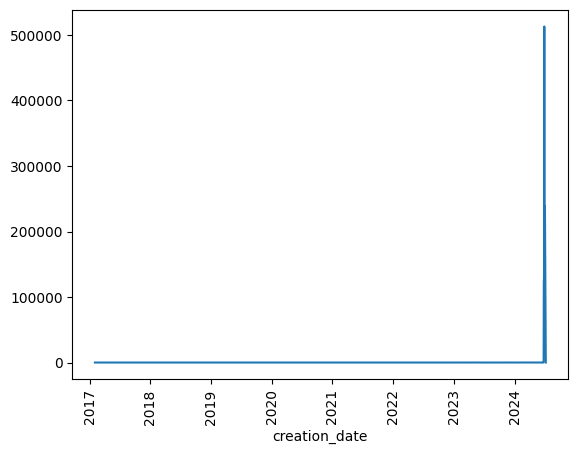

In [43]:
df['creation_date'].dt.date.value_counts().sort_index().plot(rot=90)

<Axes: xlabel='creation_date'>

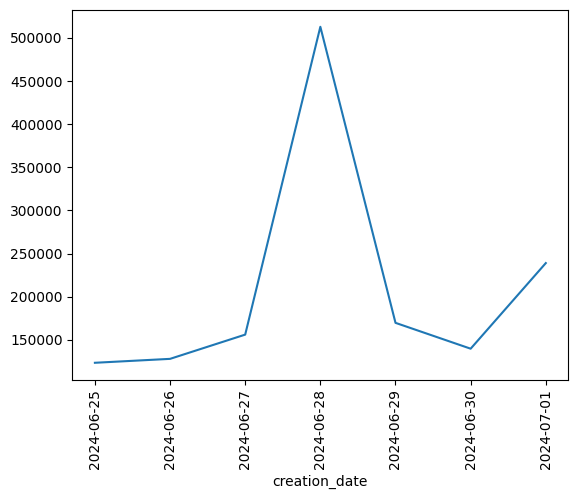

In [44]:
start_date = '2024-06-25'
end_date = '2024-07-02'
dfFiltered = df[df['creation_date'].between(start_date, end_date)]
dfFiltered['creation_date'].dt.date.value_counts().sort_index().plot(rot=90)

<Axes: xlabel='Number of posts', ylabel='Language'>

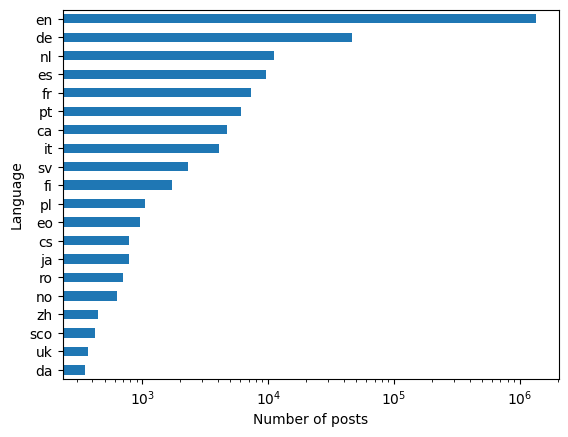

In [45]:
dfFiltered["data_langs"].value_counts(ascending=True).tail(20).plot(kind='barh',logx=True,ylabel="Language",xlabel="Number of posts")

<Axes: xlabel='Number of posts', ylabel='Hashtag'>

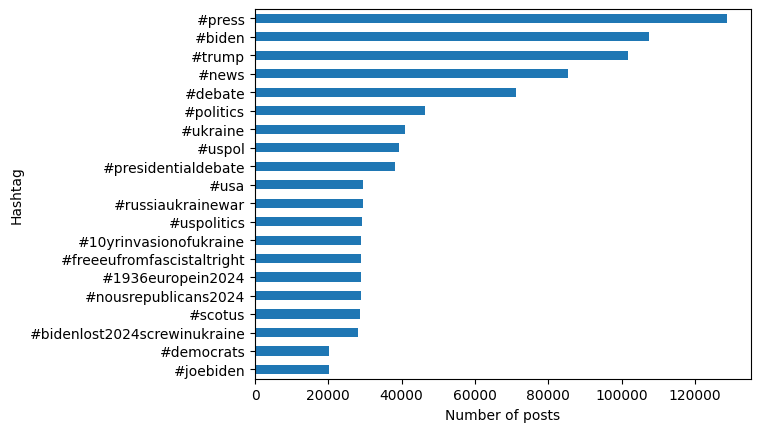

In [78]:
# get counts of the hashtags
# hashtags are lists of strings
# clean each hashtag
hashtags = dfFiltered["hashtags"].dropna().apply(lambda hashtagList: [hashtag.lower().strip() for hashtag in hashtagList])
hashtagsExploded = hashtags.explode()
hashtagsExplodedCounts = hashtagsExploded.value_counts(ascending=True)
hashtagsExplodedCounts.tail(20).plot(kind='barh',xlabel="Number of posts",ylabel="Hashtag")

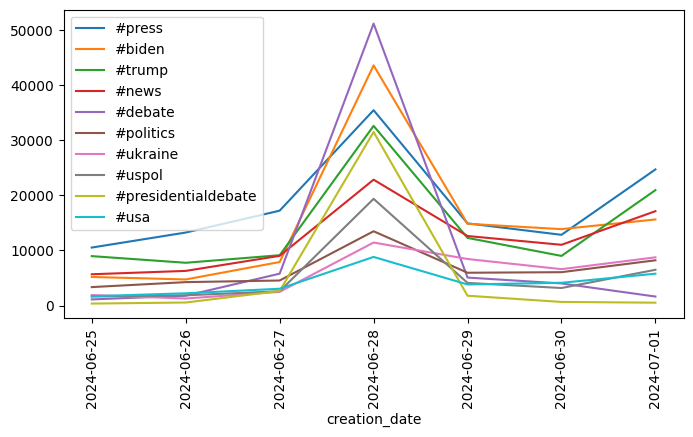

In [84]:
top_hashtags = hashtagsExplodedCounts.tail(10).iloc[::-1].index
days = dfFiltered['creation_date'].dt.date.unique()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for hashtag in top_hashtags:
    posts_with_hashtag = dfFiltered[hashtags.apply(lambda hashtags: hashtag in hashtags)]
    posts_with_hashtag['creation_date'].dt.date.value_counts().sort_index().plot(rot=90, label=hashtag, ax=ax)
plt.legend()


<Axes: xlabel='Number of posts', ylabel='Server'>

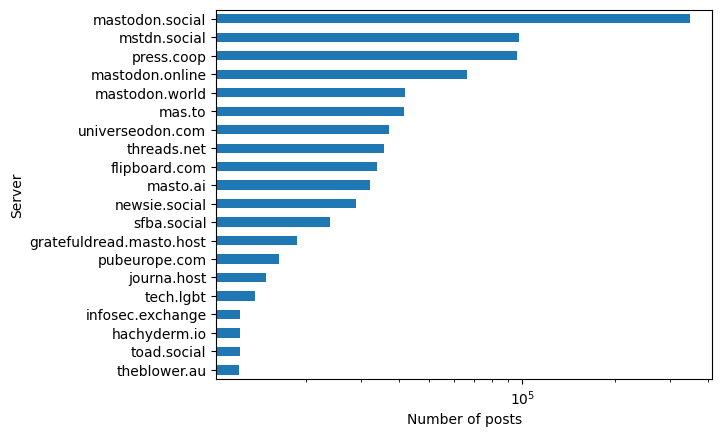

In [47]:
# get the top servers by number of posts user_id is https://<server>/...
dfFiltered["user_id"].str.extract(r"https://([^/]+)")[0].value_counts(ascending=True).tail(20).plot(kind='barh',logx=True,ylabel="Server",xlabel="Number of posts")

In [48]:
display(dfFiltered.iloc[dfFiltered["data_account_followers_count"].argmax()])


creation_date                                           2024-06-28 06:42:34+00:00
text                                       @CNN    #USElection   #Vote   #Debate 
data_server                                                mastodon.adtension.com
hashtags                                            [#uselection, #vote, #debate]
mentioned_users                                                            [@cnn]
urls                                                    [https://press.coop/@CNN]
post_id                         https://mastodon.adtension.com/users/admin/sta...
user_id                                https://mastodon.adtension.com/users/admin
linked_post                                                                  None
linked_post_user_id                                                          None
root_post                                                                    None
root_post_user_id                                                            None
post_type       

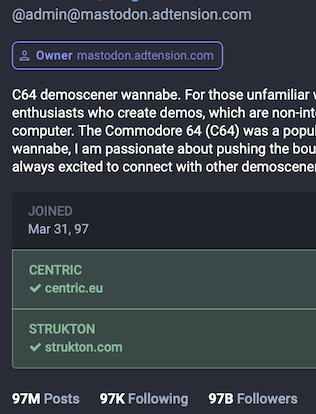

In [49]:
dfFiltered[dfFiltered["user_id"].str.startswith("https://mastodon.social/").astype(bool)]

,creation_date,text,data_server,hashtags,mentioned_users,urls,post_id,user_id,linked_post,linked_post_user_id,root_post,root_post_user_id,post_type,data_langs,data_internal_id,data_internal_user_id,data_account_followers_count,data_account_following_count,data_account_bot
7,2024-06-25 00:07:46+00:00,Biden se diz ‘consternado’ por tentativa de ho...,mastodon.social,"[#palestina, #joebiden, #israel, #hamas, #faix...",[],[https://www.cartacapital.com.br/mundo/biden-s...,https://mastodon.social/users/cartacapital/sta...,https://mastodon.social/users/cartacapital,None,None,None,None,post,en,112674345250743018,110943100427734275,70,0,True
13,2024-06-25 00:12:17+00:00,Ronny Jackson Just Demanded Biden Submit To PE...,mastodon.social,[],[],[https://politizoom.com/ronny-jackson-just-dem...,https://mastodon.social/users/realTuckFrumper/...,https://mastodon.social/users/realTuckFrumper,None,None,None,None,post,en,112674363100382750,109666764315259404,3228,102,False
22,2024-06-25 00:15:53+00:00,#Uspoli #Cdnpoli #UK #Gaza #Palestine...,mastodon.social,"[#uspoli, #cdnpoli, #uk, #gaza, #palestine, #a...",[],[https://www.youtube.com/watch],https://mastodon.social/users/PBruce/statuses/...,https://mastodon.social/users/PBruce,None,None,None,None,post,en,112674377138422168,109338255508413907,954,1093,False
29,2024-06-25 00:22:38+00:00,TFG enabler #Assange will plead guilty to on...,mastodon.social,[#assange],[],[https://archive.thinkprogress.org/trump-menti...,https://mastodon.social/users/ridetheory/statu...,https://mastodon.social/users/ridetheory,None,None,None,None,post,en,112674403714210155,29044,201,37,False
30,2024-06-25 00:22:38+00:00,TFG enabler #Assange will plead guilty to on...,mastodon.social,[#assange],[],[https://archive.thinkprogress.org/trump-menti...,https://mastodon.social/users/ridetheory/statu...,https://mastodon.social/users/ridetheory,None,None,None,None,post,en,112674403714210155,29044,201,37,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700873,2024-07-01 23:27:07+00:00,"We have a fairly new arrival to Mastodon, can ...",mastodon.social,[],[@evan_lme],[],https://mastodon.social/users/palin/statuses/1...,https://mastodon.social/users/palin,None,None,None,None,post,en,112713821545040334,110426669762409929,651,1019,False
1700894,2024-07-01 22:40:22+00:00,Trump ran by far the most corrupt presidency i...,mastodon.social,[],[],[],https://mastodon.social/users/dangillmor/statu...,https://mastodon.social/users/dangillmor,None,None,None,None,post,en,112713637792443797,109571581005152264,34463,936,False
1700983,2024-07-01 22:11:56+00:00,THE ELECTION IS NOT BETWEEN TWO MENIT'S BETWEE...,mastodon.social,[],[],[],https://mastodon.social/users/shannonpersists/...,https://mastodon.social/users/shannonpersists,None,None,None,None,post,en,112713525951249463,111483283023062248,878,1681,False
1701252,2024-06-30 14:11:00+00:00,Just going to leave this here. #StillRidinWit...,mastodon.social,[#stillridinwithbiden24],[],[],https://mastodon.social/users/democratsabroad/...,https://mastodon.social/users/democratsabroad,None,None,None,None,post,en,112705972529080120,112656679257346067,274,490,False


In [86]:
dfOnlyMastodonSocial = dfFiltered[dfFiltered["user_id"].str.startswith("https://mastodon.social/").fillna(False)]
dfOnlyMastodonSocial

,creation_date,text,data_server,hashtags,mentioned_users,urls,post_id,user_id,linked_post,linked_post_user_id,...,data_internal_id,data_internal_user_id,data_account_followers_count,data_account_following_count,data_account_bot,#presidentialdebate,#news,#biden,#uspol,#debate
7,2024-06-25 00:07:46+00:00,Biden se diz ‘consternado’ por tentativa de ho...,mastodon.social,"[#palestina, #joebiden, #israel, #hamas, #faix...",[],[https://www.cartacapital.com.br/mundo/biden-s...,https://mastodon.social/users/cartacapital/sta...,https://mastodon.social/users/cartacapital,None,None,...,112674345250743018,110943100427734275,70,0,True,False,False,False,False,False
13,2024-06-25 00:12:17+00:00,Ronny Jackson Just Demanded Biden Submit To PE...,mastodon.social,[],[],[https://politizoom.com/ronny-jackson-just-dem...,https://mastodon.social/users/realTuckFrumper/...,https://mastodon.social/users/realTuckFrumper,None,None,...,112674363100382750,109666764315259404,3228,102,False,False,False,False,False,False
22,2024-06-25 00:15:53+00:00,#Uspoli #Cdnpoli #UK #Gaza #Palestine...,mastodon.social,"[#uspoli, #cdnpoli, #uk, #gaza, #palestine, #a...",[],[https://www.youtube.com/watch],https://mastodon.social/users/PBruce/statuses/...,https://mastodon.social/users/PBruce,None,None,...,112674377138422168,109338255508413907,954,1093,False,False,False,False,False,False
29,2024-06-25 00:22:38+00:00,TFG enabler #Assange will plead guilty to on...,mastodon.social,[#assange],[],[https://archive.thinkprogress.org/trump-menti...,https://mastodon.social/users/ridetheory/statu...,https://mastodon.social/users/ridetheory,None,None,...,112674403714210155,29044,201,37,False,False,False,False,False,False
30,2024-06-25 00:22:38+00:00,TFG enabler #Assange will plead guilty to on...,mastodon.social,[#assange],[],[https://archive.thinkprogress.org/trump-menti...,https://mastodon.social/users/ridetheory/statu...,https://mastodon.social/users/ridetheory,None,None,...,112674403714210155,29044,201,37,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700873,2024-07-01 23:27:07+00:00,"We have a fairly new arrival to Mastodon, can ...",mastodon.social,[],[@evan_lme],[],https://mastodon.social/users/palin/statuses/1...,https://mastodon.social/users/palin,None,None,...,112713821545040334,110426669762409929,651,1019,False,False,False,False,False,False
1700894,2024-07-01 22:40:22+00:00,Trump ran by far the most corrupt presidency i...,mastodon.social,[],[],[],https://mastodon.social/users/dangillmor/statu...,https://mastodon.social/users/dangillmor,None,None,...,112713637792443797,109571581005152264,34463,936,False,False,False,False,False,False
1700983,2024-07-01 22:11:56+00:00,THE ELECTION IS NOT BETWEEN TWO MENIT'S BETWEE...,mastodon.social,[],[],[],https://mastodon.social/users/shannonpersists/...,https://mastodon.social/users/shannonpersists,None,None,...,112713525951249463,111483283023062248,878,1681,False,False,False,False,False,False
1701252,2024-06-30 14:11:00+00:00,Just going to leave this here. #StillRidinWit...,mastodon.social,[#stillridinwithbiden24],[],[],https://mastodon.social/users/democratsabroad/...,https://mastodon.social/users/democratsabroad,None,None,...,112705972529080120,112656679257346067,274,490,False,False,False,False,False,False


In [87]:
display(dfOnlyMastodonSocial.iloc[dfOnlyMastodonSocial["data_account_followers_count"].argmax()])


creation_date                                           2024-06-26 18:39:33+00:00
text                            SCOTUS tosses claims that Biden coerced social...
data_server                                                       mastodon.social
hashtags                                                                       []
mentioned_users                                                                []
urls                            [https://arstechnica.com/tech-policy/2024/06/s...
post_id                         https://mastodon.social/users/arstechnica/stat...
user_id                                 https://mastodon.social/users/arstechnica
linked_post                                                                  None
linked_post_user_id                                                          None
root_post                                                                    None
root_post_user_id                                                            None
post_type       

In [88]:
dfFiltered["data_account_bot"].value_counts()

data_account_bot
False    1256925
True      211629
Name: count, dtype: int64

In [54]:
# Remove bots

In [55]:
# Custom from the audience

In [89]:
# Save to filtered feather format 
with gzip.open(dataPath / f"{datasetName}_filtered.feather.gz", 'wb') as f:
    dfFiltered.reset_index(drop=True).to_feather(f)